# Supplementary Material plots for data representativeness

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [37]:
data = '../../data/company_headquarters.csv'

In [38]:
df = pd.read_csv(data)

In [39]:
df.tail()

,rank,name,industry,revenue (usd million),revenue growth,employees,headquarters
495,496,Crown Castle,Real estate,"5,763",Increase 7.3%,"5,100","Houston, Texas"
496,497,Simon Property Group,Real estate,"5,755",Increase 1.7%,"3,750","Indianapolis, Indiana"
497,498,Cerner,Healthcare,"5,693",Increase 6.1%,"27,400","North Kansas City, Missouri"
498,499,Post Holdings,Food processing,"5,681",Decrease 9.2%,"10,100","St. Louis, Missouri"
499,500,Huntington Bancshares,Financials,"5,655",Increase 7.3%,"15,664","Columbus, Ohio"


In [40]:
df.columns

Index(['rank', 'name', 'industry', 'revenue (usd million)', 'revenue growth',
       'employees', 'headquarters'],
      dtype='object')

In [41]:
our_data = '../../preprocessed/reviews_master_no_text.csv'

In [42]:
our_df = pd.read_csv(our_data)

In [43]:
our_df.tail()

,company_id,date,employee_status,employee_title,location,post_index,rating_overall,stress_post,company_name,post_id,state,Region,Division,GICSSector,GICSSubIndustry,Headquarters Location,quarter,year,half-year
463310,694_deloitte,Sun Mar 10 2019 11:59:20 GMT+0000 (Greenwich M...,Current Employee,Assistant I Audit,"Malta, MT",694.0,5.0,0.0,deloitte,694_deloitte,MT,West,Mountain,NaN,NaN,NaN,2019 Q1,2019,2019 1st-half
463311,737_deloitte,Tue Feb 19 2019 05:06:27 GMT+0000 (Greenwich M...,Former Employee,Senior Analyst,"Malta, MT",737.0,4.0,0.0,deloitte,737_deloitte,MT,West,Mountain,NaN,NaN,NaN,2019 Q1,2019,2019 1st-half
463312,2038_deloitte,Wed Mar 15 2017 16:42:01 GMT+0000 (Greenwich M...,Current Employee,Audit Senior,"Malta, MT",2038.0,2.0,0.0,deloitte,2038_deloitte,MT,West,Mountain,NaN,NaN,NaN,2017 Q1,2017,2017 1st-half
463313,3945_deloitte,Wed Apr 22 2015 20:34:57 GMT+0100 (British Sum...,"Business Analyst in Helena, MT",NaN,"Helena, MT",3945.0,4.0,0.0,deloitte,3945_deloitte,MT,West,Mountain,NaN,NaN,NaN,2015 Q2,2015,2015 1st-half
463314,4025_deloitte,Fri Feb 20 2015 22:40:10 GMT+0000 (Greenwich M...,Former Employee,Audit Supervisor,"Malta, MT",4025.0,3.0,0.0,deloitte,4025_deloitte,MT,West,Mountain,NaN,NaN,NaN,2015 Q1,2015,2015 1st-half


In [44]:
our_df.columns

Index(['company_id', 'date', 'employee_status', 'employee_title', 'location',
       'post_index', 'rating_overall', 'stress_post', 'company_name',
       'post_id', 'state', 'Region', 'Division', 'GICSSector',
       'GICSSubIndustry', 'Headquarters Location', 'quarter', 'year',
       'half-year'],
      dtype='object')

In [45]:
# df['headquarters'].unique()

In [46]:
def state_from_loc(df, col, out_col_name):
    def splitting(x):
#         print(x)
        return x.split(',')[1].strip().replace('�','').replace('\xa0','').replace(';Pittsburgh','').replace('[3]','')
    df[out_col_name] = df[col].astype(str).apply(lambda x: splitting(x))

In [47]:
state_from_loc(df, 'headquarters', 'headquarters_location')

In [48]:
our_df = our_df.dropna(subset=['Headquarters Location']).copy()
state_from_loc(our_df, 'Headquarters Location', 'headquarters_location')

In [49]:
df['headquarters_location'].unique()

array(['Arkansas', 'Washington', 'California', 'Rhode Island', 'Texas',
       'Minnesota', 'Nebraska', 'Pennsylvania', 'Connecticut', 'Michigan',
       'Ohio', 'New York', 'Illinois', 'D.C.', 'North Carolina',
       'Georgia', 'Indiana', 'Massachusetts', 'New Jersey', 'Virginia',
       'Missouri', 'Tennessee', 'Kentucky', 'Idaho', 'Maryland',
       'Cook County', 'Oregon', 'Florida', 'Wisconsin', 'Colorado',
       'Oklahoma', 'Louisiana', 'Delaware', 'Arizona', 'Iowa', 'Nevada',
       'IL', 'Kansas', 'Alabama'], dtype=object)

In [50]:
our_df['headquarters_location'].unique()

array(['Texas', 'California', 'New York', 'Minnesota', 'Arizona',
       'Washington', 'Georgia', 'UK', 'Ohio', 'Michigan', 'New Jersey',
       'Illinois', 'Florida', 'Ireland', 'Oregon', 'Tennessee',
       'Virginia', 'Wisconsin', 'Massachusetts', 'Switzerland',
       'Kentucky', 'Connecticut', 'North Carolina', 'United Kingdom',
       'Arkansas', 'Rhode Island', 'Maryland', 'Pennsylvania', 'Colorado',
       'Oklahoma', 'Maine', 'Indiana', 'Idaho', 'Missouri', 'Louisiana',
       'Massachusetts[4]', 'Bristol', 'Nevada', 'Surrey', 'Nebraska',
       'Utah', 'Netherlands', 'Delaware', 'VA', 'Bermuda'], dtype=object)

In [51]:
df.head()

,rank,name,industry,revenue (usd million),revenue growth,employees,headquarters,headquarters_location
0,1,Walmart,Retail,"559,200",Increase 1.9%,"2,200,000","Bentonville, Arkansas",Arkansas
1,2,Amazon,Retail,"386,064",Increase 20.5%,"1,225,300","Seattle, Washington",Washington
2,3,Apple Inc.,Electronics industry,"274,515",Increase 2.0%,"137,000","Cupertino, California",California
3,4,CVS Health,Healthcare,"268,706",Increase 32.0%,"290,000","Woonsocket, Rhode Island",Rhode Island
4,5,ExxonMobil,Petroleum industry,"264,938",Decrease 8.7%,"74,900","Irving, Texas",Texas


In [52]:
fortune_500companies_per_state = df.groupby(by=['headquarters_location'])['name'].count().reset_index().rename(columns={'name':'fortune_companies'})
fortune_500companies_per_state

,headquarters_location,fortune_companies
0,Alabama,1
1,Arizona,5
2,Arkansas,5
3,California,50
4,Colorado,11
5,Connecticut,14
6,Cook County,1
7,D.C.,2
8,Delaware,2
9,Florida,18


In [53]:
our_df_companies = our_df[['company_name', 'headquarters_location']].drop_duplicates()

In [54]:
our_companies_per_state = our_df_companies.groupby(by=['headquarters_location'])['company_name'].count().reset_index().rename(columns={'company_name':'our_companies'})
our_companies_per_state

,headquarters_location,our_companies
0,Arizona,3
1,Arkansas,1
2,Bermuda,1
3,Bristol,1
4,California,48
5,Colorado,6
6,Connecticut,7
7,Delaware,2
8,Florida,11
9,Georgia,11


In [55]:
corr_df = our_companies_per_state.merge(fortune_500companies_per_state, on=['headquarters_location'])

In [56]:
corr_df['log(our_companies)'] = corr_df['our_companies'].apply(np.log)
corr_df['log(fortune_companies)'] = corr_df['fortune_companies'].apply(np.log)

In [57]:
corr_df.corr(method='spearman')

,our_companies,fortune_companies,log(our_companies),log(fortune_companies)
our_companies,1.000000,0.914078,1.000000,0.914078
fortune_companies,0.914078,1.000000,0.914078,1.000000
log(our_companies),1.000000,0.914078,1.000000,0.914078
log(fortune_companies),0.914078,1.000000,0.914078,1.000000


In [58]:
corr_df.corr()

,our_companies,fortune_companies,log(our_companies),log(fortune_companies)
our_companies,1.000000,0.934070,0.855176,0.768471
fortune_companies,0.934070,1.000000,0.860599,0.871677
log(our_companies),0.855176,0.860599,1.000000,0.886079
log(fortune_companies),0.768471,0.871677,0.886079,1.000000


In [59]:
len(corr_df)

33

In [60]:
state_codes = pd.read_csv('../../data/us_states_geo.csv')[['state','state_code']]

corr_df = corr_df.merge(state_codes.rename(columns={'state':'headquarters_location',\
                                                  'state_code':'abbreviation' }),\
                        on=['headquarters_location'])

In [61]:
corr_df

,headquarters_location,our_companies,fortune_companies,log(our_companies),log(fortune_companies),abbreviation
0,Arizona,3,5,1.098612,1.609438,AZ
1,Arkansas,1,5,0.000000,1.609438,AR
2,California,48,50,3.871201,3.912023,CA
3,Colorado,6,11,1.791759,2.397895,CO
4,Connecticut,7,14,1.945910,2.639057,CT
5,Delaware,2,2,0.693147,0.693147,DE
6,Florida,11,18,2.397895,2.890372,FL
7,Georgia,11,18,2.397895,2.890372,GA
8,Idaho,2,2,0.693147,0.693147,ID
9,Illinois,24,36,3.178054,3.583519,IL


In [62]:
import random as rnd
from adjustText import adjust_text

PCT_TO_PLOT = 0.7
def scatter_text_v2(x, y, text_column, data, title, xlabel, ylabel):
    """
        LR Scatter plot with names
    """
    
    sns.set(font_scale=2.5)
    sns.set_style("whitegrid")
    data=data.dropna()
    
    # Create the lr scatter plot
#     p1 = sns.lmplot(x=x, y=y, data=data, height = 8, legend=False)
    p1 = sns.jointplot(x=x, y=y, data=data, height = 11.5,  kind="reg");
    
    texts = []
    label_us = ['NE', 'AR'] # 'MD', 'KY', 
    label_us_pos = ['DE', 'DC', 'CA']
    # Add text besides each point
    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            random_num = rnd.random()
            if str(point['val']) in label_us:
                texts.append(ax.text(point['x']+.02, point['y'], str(point['val']), color='red'))
                continue
            if random_num < PCT_TO_PLOT or str(point['val']) in label_us_pos:
                texts.append(ax.text(point['x']+.02, point['y'], str(point['val']), color='gray'))
    
    label_point(data[x], data[y], data[text_column], plt.gca()) 
    adjust_text(texts, force_text=0.7, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
    
    X= np.array(data[x]).reshape(-1, 1)
    y=data[y]
    reg = LinearRegression().fit(X, y)
    R2 = reg.score(X, y)
    
    # Set title and axis labels
#     plt.title(title + r"$R^2$ = {:.2f}".format(R2))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xlim([-0.2,4.2])
    plt.ylim([-0.2,4.2])
    
    plt.savefig("../../results/headquarters_fortune_ours.png")
    
    return p1

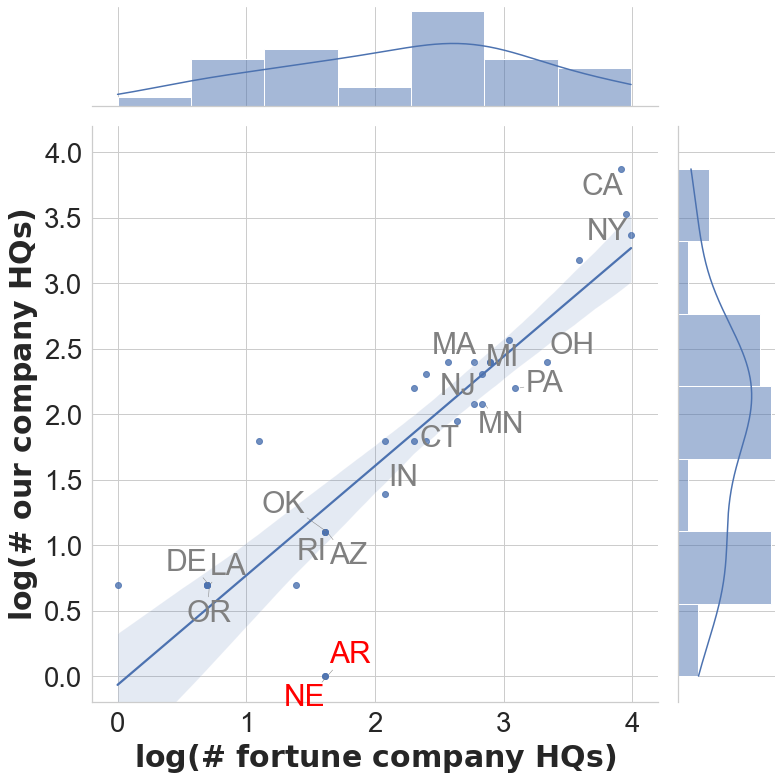

In [63]:
scatter_text_v2(x='log(fortune_companies)', y='log(our_companies)',\
             text_column='abbreviation', \
             data=corr_df, title='',\
             xlabel='$\\bf{log(\#\\ fortune\\ company\\ HQs)}$',
             ylabel='$\\bf{log(\#\\ our\\ company\\ HQs)}$')

In [64]:
to_drop = ['DE', 'ID', 'LA', 'AR', 'OK', 'MA', 'GA', 'MN']
corr_df = corr_df.reset_index()
corr_df = corr_df.set_index('abbreviation')
for drop in to_drop:
    try:
        corr_df = corr_df.drop(drop)
    except:
        continue
corr_df = corr_df.reset_index()

In [65]:
corr_df[corr_df['log(fortune_companies)']==0]

,abbreviation,index,headquarters_location,our_companies,fortune_companies,log(our_companies),log(fortune_companies)
7,KY,11,Kentucky,2,1,0.693147,0.0


In [66]:
corr_df[corr_df['log(our_companies)']==0]

,abbreviation,index,headquarters_location,our_companies,fortune_companies,log(our_companies),log(fortune_companies)
11,NE,18,Nebraska,1,5,0.0,1.609438


In [67]:
corr_df.groupby(by=['log(fortune_companies)'])['abbreviation'].apply(list).reset_index()
# to_drop = ['DE', 'ID', 'LA', 'AR', 'OK', 'MA', 'GA', 'MN']

,log(fortune_companies),abbreviation
0,0.000000,[KY]
1,0.693147,[OR]
2,1.098612,[MD]
3,1.386294,[NV]
4,1.609438,"[AZ, NE, RI]"
5,2.079442,"[IN, WI]"
6,2.302585,"[MO, TN]"
7,2.397895,"[CO, WA]"
8,2.564949,[NC]
9,2.639057,[CT]
